<a href="https://colab.research.google.com/github/disha1409/MachineLearning/blob/master/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('/content/drive/My Drive/dataset/StudentsPerformance.csv')
df.head()




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
X=df.iloc[:,5:].values
#X.columns=['math score','reading score','writing score']


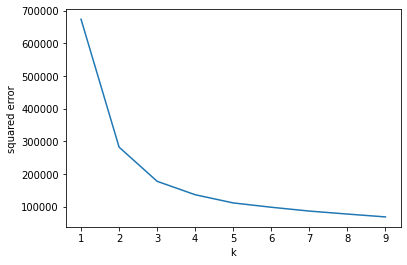

In [54]:
#k mean clustering

MSE=[]
rangeK=range(1,10)
for k in rangeK:
    Kmean=KMeans(n_clusters=k)
    Kmean.fit(X)
    MSE.append(Kmean.inertia_)

plt.xlabel('k')
plt.ylabel('squared error')
plt.plot(rangeK,MSE)



In [55]:
# 5 mean cluster
km=KMeans(n_clusters=5)
y=km.fit_predict(X)
km.labels_
df['cluster from K mean']=y
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster from K mean
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,4


In [0]:
reduced_data = PCA()


plt.scatter(X[km==0,0],X[km==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[km==1,0],X[km==1,1],s=100,c='red',label='cluster 2')
plt.scatter(X[km==2,0],X[km==2,1],s=100,c='red',label='cluster 3')
plt.scatter(X[km==3,0],X[km==3,1],s=100,c='red',label='cluster 4')
plt.scatter(X[km==4,0],X[km==4,1],s=100,c='red',label='cluster 5')

plt.title('clusters')
plt.xlabel('maths score')
plt.ylabel('reading score')
plt.show()

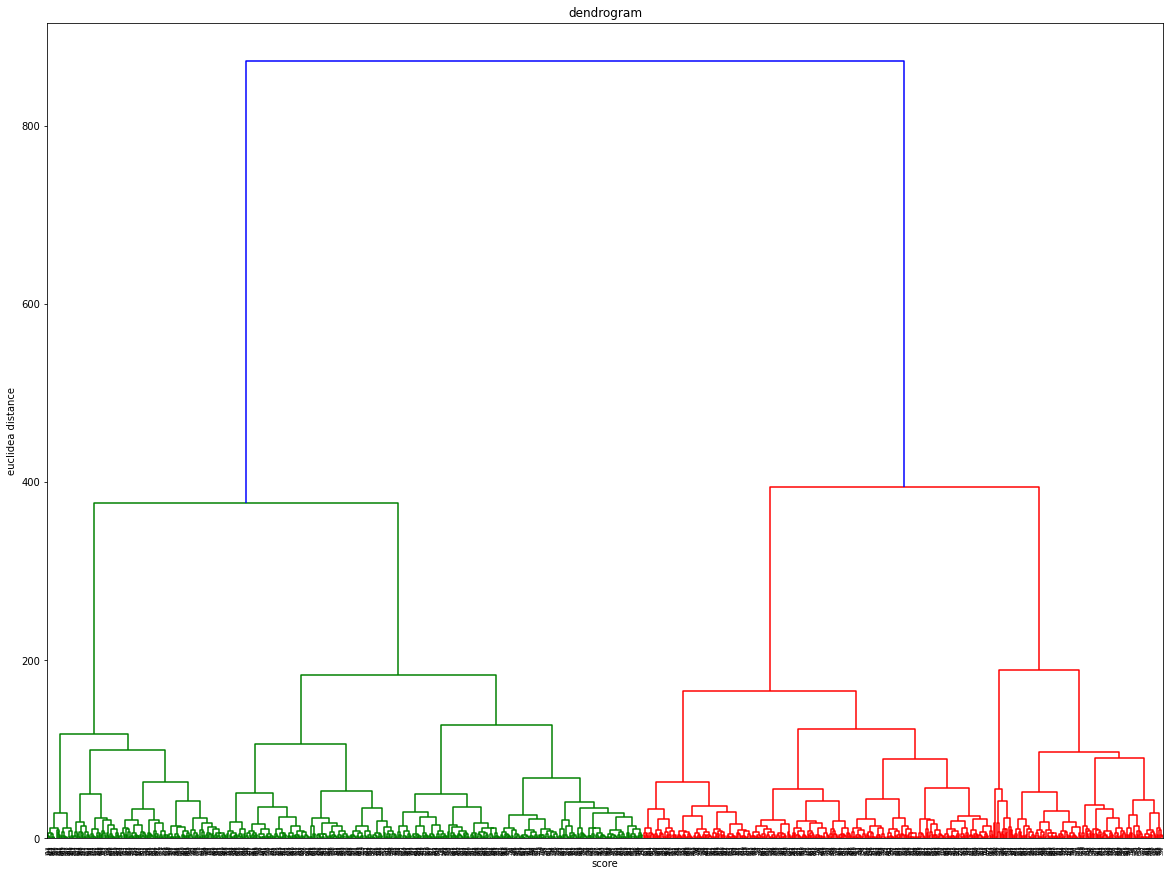

In [56]:
#heirarchical clustring
import scipy.cluster.hierarchy as sc
#dendogram
plt.figure(figsize=(20,15))
dend=sc.dendrogram(sc.linkage(X,method = "ward"))
plt.title("dendrogram")
plt.xlabel('score')
plt.ylabel('euclidea distance')
plt.show()

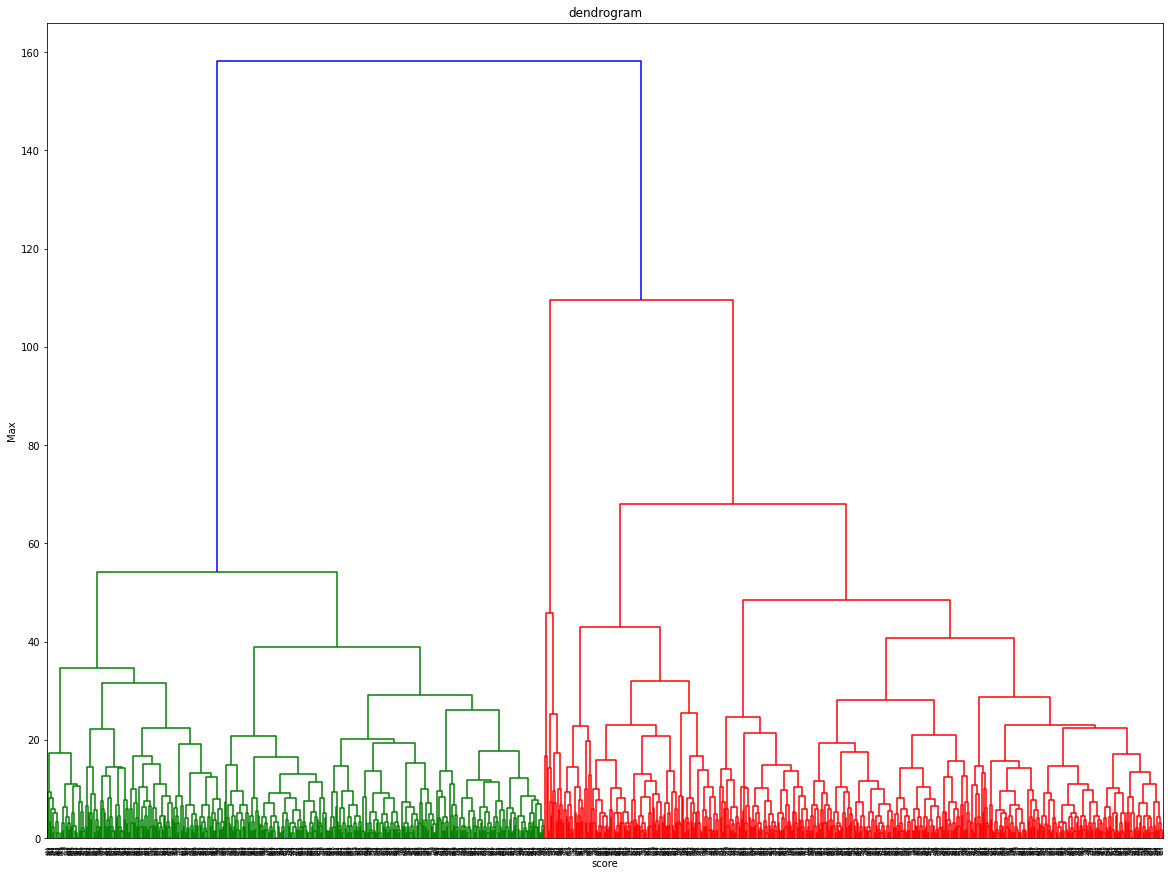

In [57]:
plt.figure(figsize=(20,15))
dend=sc.dendrogram(sc.linkage(X,method = "complete"))
plt.title("dendrogram")
plt.xlabel('score')
plt.ylabel('Max')
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc
df['cluster from h']=y_hc
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster from K mean,cluster from h
0,female,group B,bachelor's degree,standard,none,72,72,74,4,0
1,female,group C,some college,standard,completed,69,90,88,2,0
2,female,group B,master's degree,standard,none,90,95,93,2,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,1
4,male,group C,some college,standard,none,76,78,75,4,0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2,0
996,male,group C,high school,free/reduced,none,62,55,55,3,2
997,female,group C,high school,free/reduced,completed,59,71,65,0,2
998,female,group D,some college,standard,completed,68,78,77,4,0


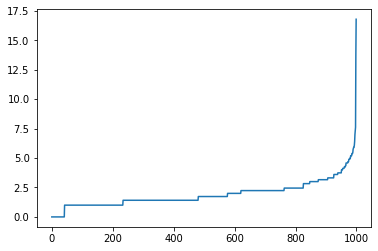

In [64]:
#db scan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
n= NearestNeighbors(n_neighbors=2)
nbr=n.fit(X)
distances,indices=n.kneighbors(X)
distances = np.sort(distances,axis=0)
distances =distances[:,1]
plt.plot(distances)




In [78]:

dbs=DBSCAN(eps=4.5,metric='euclidean',min_samples=5)
y=dbs.fit_predict(X)
y
df['cluster from Dbscan']=y
df



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster from K mean,cluster from h,cluster from Dbscan
0,female,group B,bachelor's degree,standard,none,72,72,74,4,0,0
1,female,group C,some college,standard,completed,69,90,88,2,0,-1
2,female,group B,master's degree,standard,none,90,95,93,2,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,1,-1
4,male,group C,some college,standard,none,76,78,75,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2,0,0
996,male,group C,high school,free/reduced,none,62,55,55,3,2,0
997,female,group C,high school,free/reduced,completed,59,71,65,0,2,0
998,female,group D,some college,standard,completed,68,78,77,4,0,0
